#### Importando as bibliotecas

In [246]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#### 1- Carregando os dados e preparando para a análise

In [247]:
# Carregando os dados
caminho_visits = 'visits_log_us.csv'
caminho_orders = 'orders_log_us.csv'
caminho_costs = 'costs_us.csv'

visits = pd.read_csv(caminho_visits)
orders = pd.read_csv(caminho_orders)
costs = pd.read_csv(caminho_costs)

In [248]:
# Visualizando os dados
visits.info()
print(visits.head())
print(visits['Device'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   99696948200

In [249]:
print(orders.head())
orders.info()

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [250]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [251]:
# Carregando os dados novamente já ajustando os tipos de dados de cada coluna
visits = pd.read_csv(caminho_visits, dtype={'Device':'category'}, parse_dates=['End Ts','Start Ts'])
orders = pd.read_csv(caminho_orders, parse_dates=['Buy Ts'])
costs = pd.read_csv(caminho_costs, parse_dates=['dt'])

In [252]:
# Excluindo duplicados
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

# Convertendo os nomes das colunas para o padrão snake_case
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [253]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 

Os dados das três tabelas foram importados, e nenhum dado duplicado ou faltante foi encontrado, além disso, ajustamos os tipos de cada coluna, alterando de object para datetime ou category.

#### 2- Relatórios e métricas

##### 2.1 Produto

##### 2.1.1 Quantas pessoas usam-no cada dia, semana e mês?

In [254]:
# Criando colunas para a data, semana, mês e ano de cada acesso
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.to_period("M")
visits['year'] = visits['start_ts'].dt.to_period("Y")

In [255]:
# Calculando o número de visitas por cada período
dau_total = round(visits.groupby('date')['uid'].nunique().mean(),2)
wau_total = round(visits.groupby(['year','week'])['uid'].nunique().mean(),2)
mau_total = round(visits.groupby(['year','month'])['uid'].nunique().mean(),2)

print('Número de usuários por dia: {}, por semana: {} e por mês: {}'.format(dau_total, wau_total, mau_total))

Número de usuários por dia: 907.99, por semana: 5716.25 e por mês: 23228.42


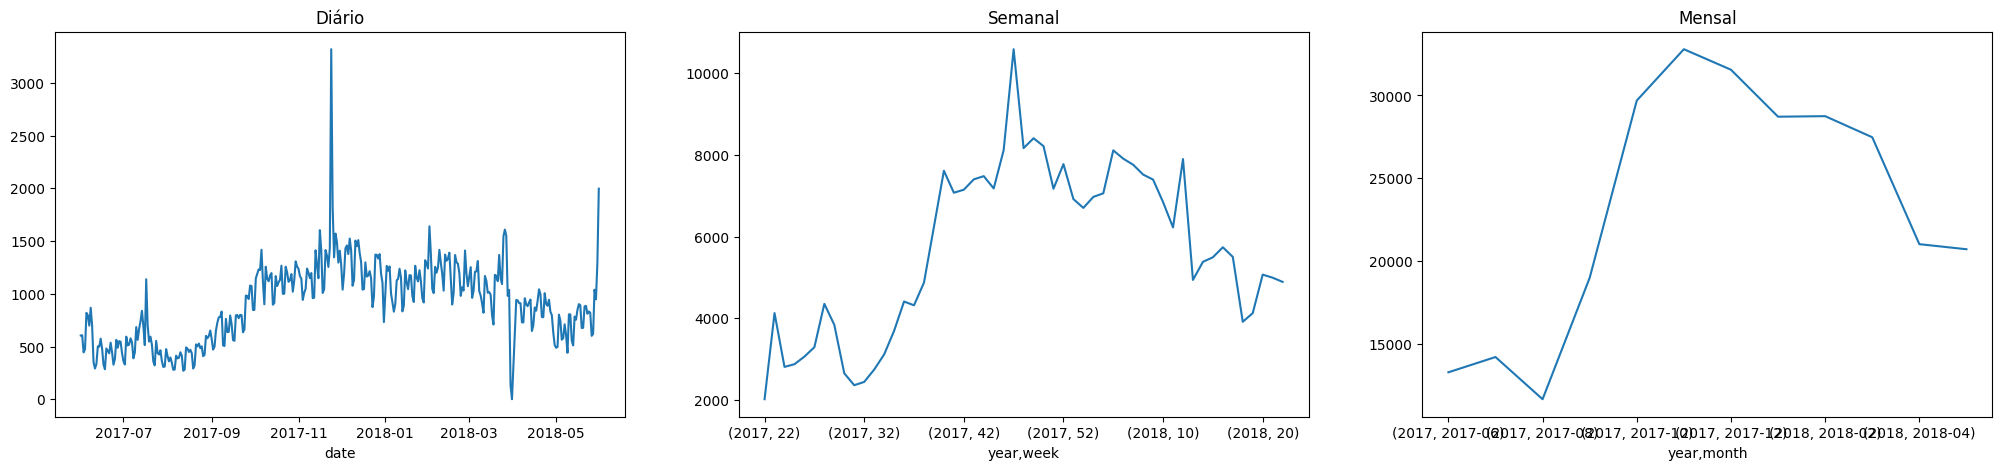

In [256]:
# Criando os subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

# Criando os gráficos e inserindo em cada subplot
daily = visits.groupby('date')['uid'].nunique()
daily.plot(ax = axes[0])
axes[0].set_title('Diário')

weekly = visits.groupby(['year','week'])['uid'].nunique()
weekly.plot(ax = axes[1])
axes[1].set_title('Semanal')

monthly = visits.groupby(['year','month'])['uid'].nunique()
monthly.plot(ax = axes[2])
axes[2].set_title('Mensal')

plt.show()

Analisando cada gráfico separadamente, vemos que cada período tem suas peculiaridades: O gráfico diário é uma representação bem detalhada e com muitas informações das variações, o que pode causar um entendimento maior de cada variação; o gráfico mensal permite uma visualização mais geral das variações, mas com pouco detalhe, podendo prejudicar o endentimento das variações reais em curtos períodos; o gráfico semanal permite uma visão mais geral ao mesmo tempo que não prejudica a visualização das sazonalidades e das pequenas variações.

##### 2.1.2 Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).

In [257]:
# Agrupando por dia e contando a quantidade de sessões
sessao_dia = round(visits.groupby('date')['uid'].count().mean(),2)
print('Número de sessões por dia: ', sessao_dia)

Número de sessões por dia:  987.36


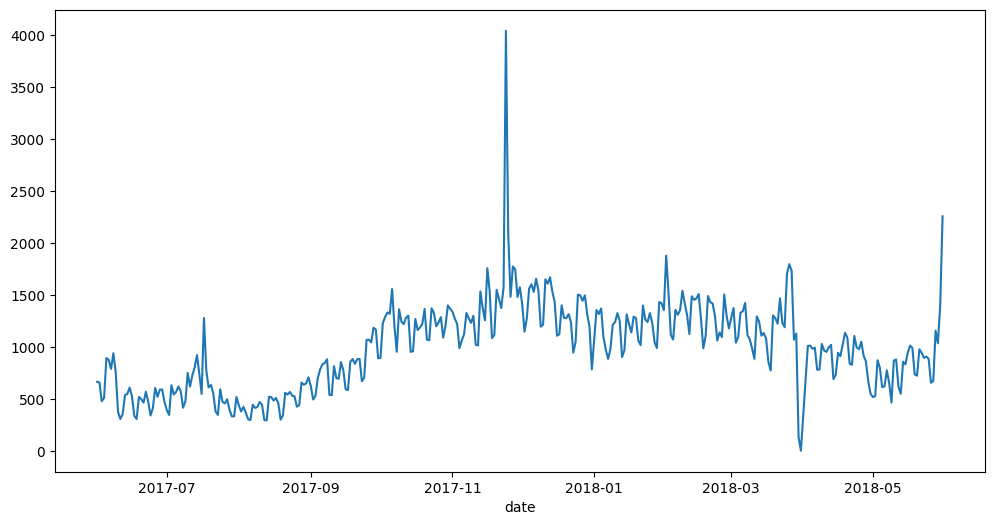

In [258]:
# Visualizando a variação de visitas
sessoes = visits.groupby('date')['uid'].count()
sessoes.plot(figsize=(12,6))
plt.show()

No gráfico acima vemos as variações diárias de sessões por usuário, observando grandes variações naturais de cada dia e ao mesmo tempo, algumas variações sazonais.

##### 2.1.3 Que comprimento tem cada sessão?

In [259]:
# Criando uma nova coluna do comprimento
visits['duration_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('O comprimento médio é:', visits['duration_seconds'].mean())

O comprimento médio é: 643.506488592098


(0.0, 10000.0)

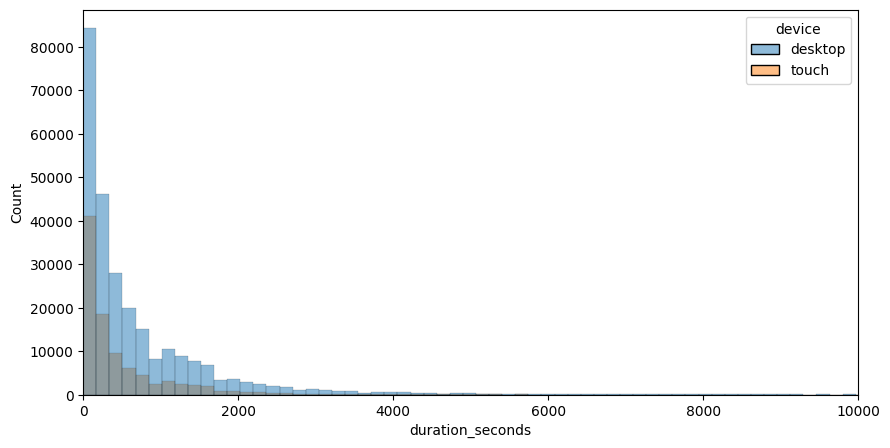

In [260]:
# Plotando os comprimentos por dispositivo
plt.figure(figsize=(10, 5))
sns.histplot(data=visits, hue= 'device', x='duration_seconds',bins=500)

plt.xlim(0, 10000)

In [261]:
asl = visits['duration_seconds'].mode()
print('A métrica ASL tem um valor de: ', asl.loc[0])

A métrica ASL tem um valor de:  60


Quando a distribuição é normal ou próxima do normal, obtemos a média ou a mediana. Mas como nossa distribuição é bastante assimétrica, calculamos a métrica de duração média da sessão (ASL) a partir da moda.

##### 2.1.4 Com que frequência os usuários voltam?

In [262]:
# Agrupanado por usuário e agregando pela menor data de visita de cada usuário
first_activity_date = (visits.groupby('uid')['start_ts']
.min()
.reset_index()
.rename(columns={'start_ts':'first_activity_date'})
)

# Insere a informação no dataframe principal
visits = visits.merge(first_activity_date, on='uid')

In [263]:
# Criando uma coluna do primeiro mes de compra
visits['first_activity_month'] = visits['first_activity_date'].dt.to_period("M")

# Cria-se uma nova coluna calculando o tempo de vida de cada usuário
visits['lifetime'] = visits['month'].astype('int64') - visits['first_activity_month'].astype('int64')

In [264]:
# Gerando uma tabela dinâmica com as informações para cada mês onde cada linha é uma cohort
retention_table = visits.pivot_table(
    index='first_activity_month',
    columns='lifetime',
    aggfunc='nunique',
    values='uid'
)
retention_table

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Retenção'}, xlabel='lifetime', ylabel='first_activity_month'>

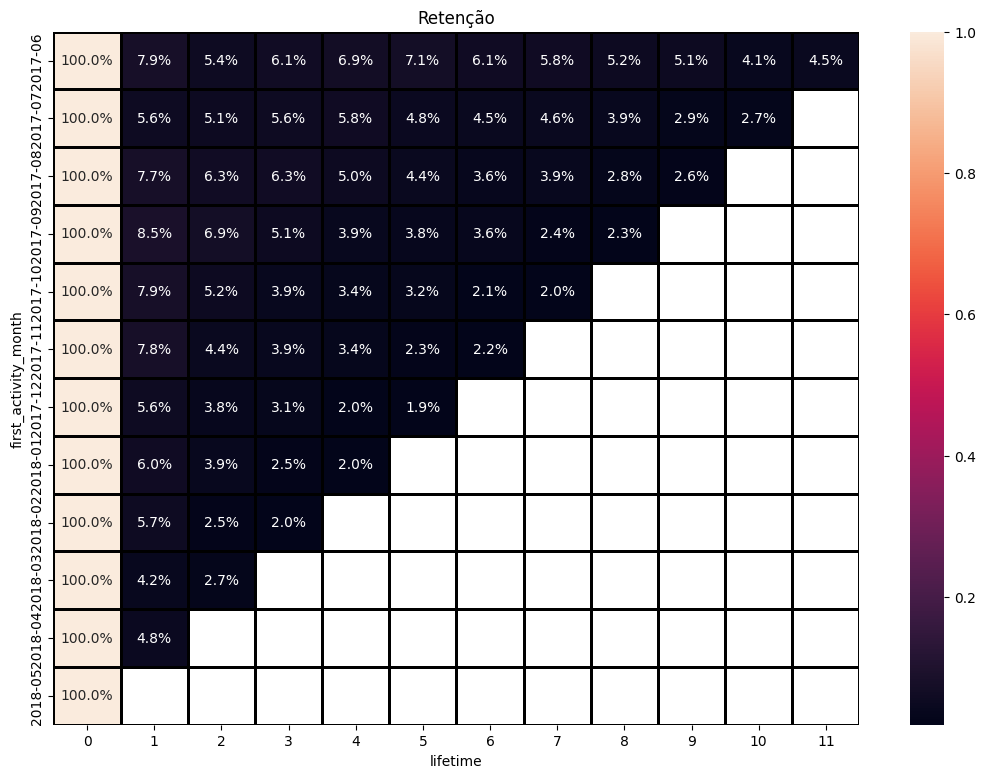

In [265]:
# Transformando em porcentagem
for col in retention_table.columns[1:]:
    retention_table[col] = retention_table[col] / retention_table[0]
retention_table[0] = 1

# Plotando o gráfico de calor
plt.figure(figsize=(13, 9))
plt.title('Retenção')
sns.heatmap(
    retention_table, annot=True, fmt='.1%', linewidths=1, linecolor='black'
)

Aqui, eu escolhi por fazer a divisão das coortes por mês e não por semana, pois o período é relativamente longo para uma análise semanal, o que faria com que a visualização da taxa de retenção fosse prejudicada. Vemos inicialmente uma queda bastante brusca na quantidade de usuários no segundo mês de cada cohort, mas depois os clientes foram permanecendo em sua maioria.

##### 2.2 Vendas

##### 2.2.1 Quando as pessoas começam a comprar?

In [266]:
# Criando colunas para cada período
orders['date'] = orders['buy_ts'].dt.date
orders['month'] = orders['buy_ts'].dt.to_period("M")
orders

,buy_ts,revenue,uid,date,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05


In [267]:
# Criando um df com as informações da data da primeira compra
first_orders_data = (orders.groupby("uid").agg({"buy_ts": "min"})
.reset_index()
.rename(columns={"buy_ts": "first_purchase"})
)

first_orders_data.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


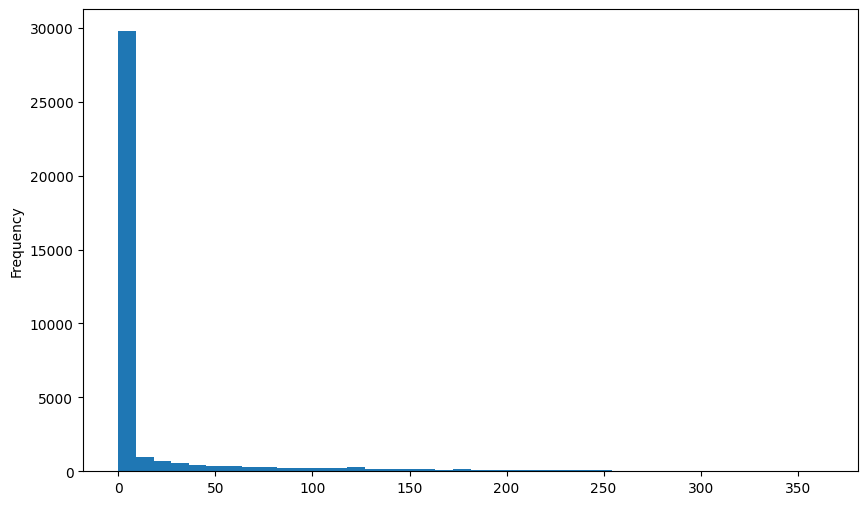

In [268]:
# Unindo o df referente ao primeiro acesso de cada usuário e a primeira compra
first_visits_first_purchase = first_activity_date.merge(first_orders_data, on="uid", how="left")
first_visits_first_purchase = first_visits_first_purchase.dropna()

# Calculando a data da primeira compra
first_visits_first_purchase["time_to_first_purchase"] = first_visits_first_purchase["first_purchase"] - first_visits_first_purchase["first_activity_date"]
first_visits_first_purchase["time_to_first_purchase"] = first_visits_first_purchase["time_to_first_purchase"].dt.days

# Plotando a informação
first_visits_first_purchase["time_to_first_purchase"].plot(kind="hist", figsize=(10, 6), bins=40)
plt.show()

Através do gráfico acima, vemos que os clientes começam a realizar as suas compras principalmente no mesmo dia em que acessam pela primeira vez.

##### 2.2.2 Quantos pedidos os clientes fazem durante um determinado período de tempo?

In [269]:
# Unindo o df da primeira visita com o df de orders
first_visit_order = first_activity_date.merge(orders, on='uid', how='left')
first_visit_order['first_activity_month'] = first_visit_order['first_activity_date'].dt.to_period("M")
first_visit_order = first_visit_order.dropna()

# Calculando a coluna de tempo entre o mês da compra e o mes da primeira visita
first_visit_order['month_diff'] = first_visit_order['month'].astype('int64') - first_visit_order['first_activity_month'].astype('int64')
first_visit_order

,uid,first_activity_date,buy_ts,revenue,date,month,first_activity_month,month_diff
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,0.55,2018-01-03,2018-01,2017-09,4
22,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,2017-06-03,2017-06,2017-06,0
23,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,2017-06-03,2017-06,2017-06,0
36,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,73.33,2017-10-11,2017-10,2017-10,0
37,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,2.44,2018-01-28,2018-01,2018-01,0
...,...,...,...,...,...,...,...,...
242034,18445407535914413204,2017-09-22 23:48:00,2017-09-24 23:48:00,0.24,2017-09-24,2017-09,2017-09,0
242035,18445407535914413204,2017-09-22 23:48:00,2017-09-25 15:56:00,0.12,2017-09-25,2017-09,2017-09,0
242040,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,4.22,2018-03-26,2018-03,2017-08,7
242053,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,9.78,2018-02-18,2018-02,2017-11,3


In [270]:
# Gerando uma tabela dinâmica com os valores da venda por mês de cada cohort
orders_per_user = (first_visit_order.groupby(['uid','month','first_activity_month','month_diff'])['revenue']
                   .sum()
                   .reset_index()
)

retention_table = orders_per_user.pivot_table(
    index='first_activity_month',
    columns='month_diff',
    aggfunc='sum',
    values='revenue'
)

<Axes: title={'center': 'Retenção'}, xlabel='month_diff', ylabel='first_activity_month'>

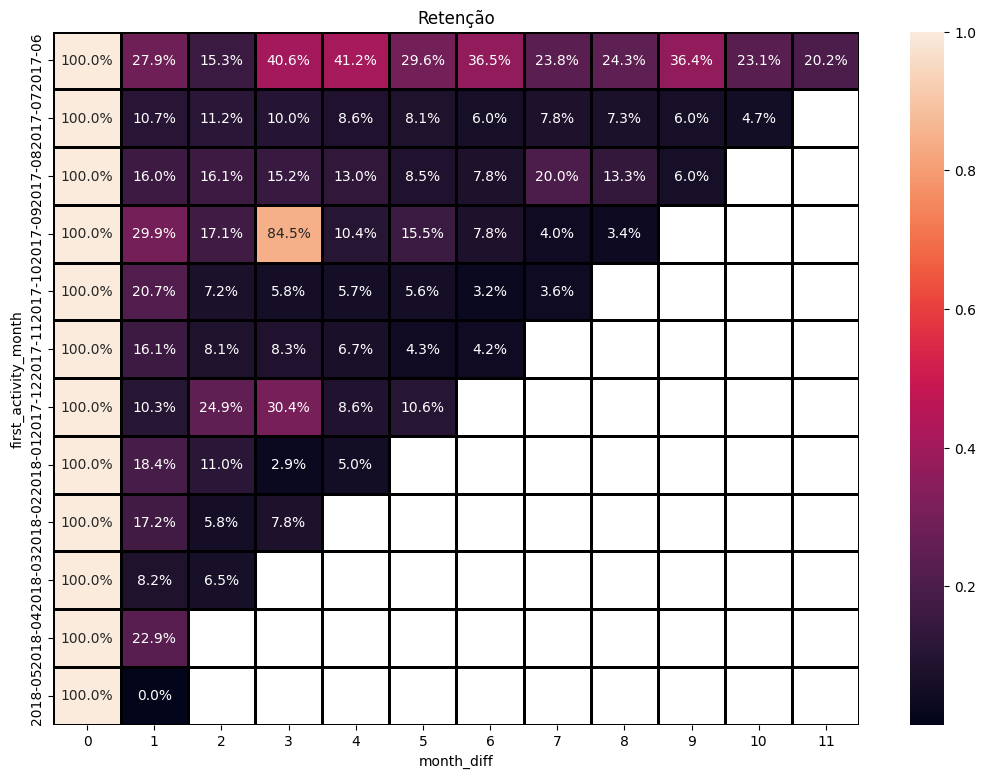

In [271]:
# Ajustando para ver as variações em percentual
for col in retention_table.columns[1:]:
    retention_table[col] = retention_table[col] / retention_table[0]
retention_table[0] = 1

# Plotando em uma gráfico de calor
plt.figure(figsize=(13, 9))
plt.title('Retenção')
sns.heatmap(
    retention_table, annot=True, fmt='.1%', linewidths=1, linecolor='black'
)

Através deste último gráfico de retenção também vemos grandes quedas logo nos primeiros meses, já que a maior concentração de vendas ocorre nos primeiros dias desde que cada usuário acessou pela primeira vez.

##### 2.2.3 Qual é o ticket médio de uma compra?

In [272]:
# Dividindo o faturamento total pela quantidade de vendas
Average_Order_Value = round(first_visit_order['revenue'].sum() / first_visit_order['revenue'].count())
print('O ticket médio das vendas é: $', Average_Order_Value)

O ticket médio das vendas é: $ 5


##### 2.2.4 Quanto dinheiro eles trazem para a empresa (LTV)? - Receita dividido pela quantidade de clientes

In [273]:
# Criando o df com a informação da data e do mês da primeira compra
orders = first_orders_data.merge(orders, on='uid')
orders['first_order_month'] = orders['first_purchase'].dt.to_period('M')

orders

,uid,first_purchase,buy_ts,revenue,date,month,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03 21:51:00,0.55,2018-01-03,2018-01,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,2017-06-03,2017-06,2017-06
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,2017-06-03,2017-06,2017-06
3,2429014661409475,2017-10-11 18:33:00,2017-10-11 18:33:00,73.33,2017-10-11,2017-10,2017-10
4,2464366381792757,2018-01-28 15:54:00,2018-01-28 15:54:00,2.44,2018-01-28,2018-01,2018-01
...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22 23:55:00,2017-09-24 23:48:00,0.24,2017-09-24,2017-09,2017-09
50411,18445407535914413204,2017-09-22 23:55:00,2017-09-25 15:56:00,0.12,2017-09-25,2017-09,2017-09
50412,18445601152732270159,2018-03-26 22:54:00,2018-03-26 22:54:00,4.22,2018-03-26,2018-03,2018-03
50413,18446156210226471712,2018-02-18 19:34:00,2018-02-18 19:34:00,9.78,2018-02-18,2018-02,2018-02


In [274]:
# Criando um df com a quantidade de compradores por cohort
first_orders = orders[['uid', 'first_order_month', 'month']].drop_duplicates(subset='uid')

cohort_sizes = (first_orders.groupby('first_order_month')['uid']
                .nunique()
                .reset_index()
                .rename(columns= {'uid':'n_buyers'})
)
cohort_sizes

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [275]:
# Mesclando as novas informações e calculando os meses do período
cohorts = orders.groupby(['first_order_month', 'month'])['revenue'].sum().reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['month_diff'] = report['month'].astype('int64') - report['first_order_month'].astype('int64')

report

,first_order_month,n_buyers,month,revenue,month_diff
0,2017-06,2023,2017-06,9557.49,0
1,2017-06,2023,2017-07,981.82,1
2,2017-06,2023,2017-08,885.34,2
3,2017-06,2023,2017-09,1931.30,3
4,2017-06,2023,2017-10,2068.58,4
...,...,...,...,...,...
74,2018-03,3533,2018-05,1114.87,2
75,2018-04,2276,2018-04,10600.69,0
76,2018-04,2276,2018-05,1209.92,1
77,2018-05,2988,2018-05,13925.76,0


In [276]:
#  Dividimos a receita pela quantidade de compradores
report['ltv'] = report['revenue'] / report['n_buyers']

# Agrupamos as cohorts através de uma tabela dinâmica
LTV = report.pivot_table(
    index='first_order_month',
    columns='month_diff',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)
LTV

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'ltv'}, xlabel='month_diff', ylabel='first_order_month'>

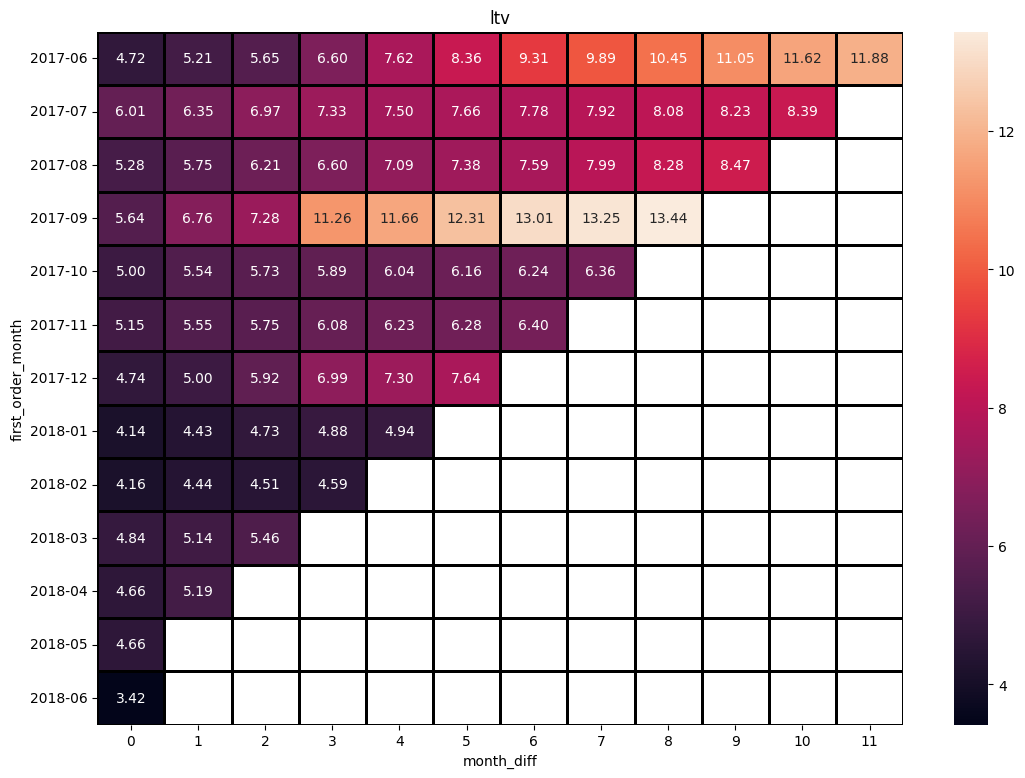

In [277]:
# Plotando o gráfico de calor
plt.figure(figsize=(13, 9))
plt.title('ltv')
sns.heatmap(
    LTV, annot=True, fmt='.2f', linewidths=1, linecolor='black'
)

O gráfico acima retorna os valores trazidos pelos usuários ao longo dos meses e de forma cumulativa. Fica clara a visualização de algumas coortes que trazem maiores retornos em menos tempo em relação a outras, e também fica visível a importância de se manter os clientes já existentes, priorizando isso a tentar buscar novos.

##### 2.3 Marketing

##### 2.3.1 Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [278]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [279]:
total_costs = costs['costs'].sum()
print('O gasto total foi de {}'.format(total_costs))

O gasto total foi de 329131.62


<Axes: title={'center': 'Costs by month'}, xlabel='month', ylabel='costs'>

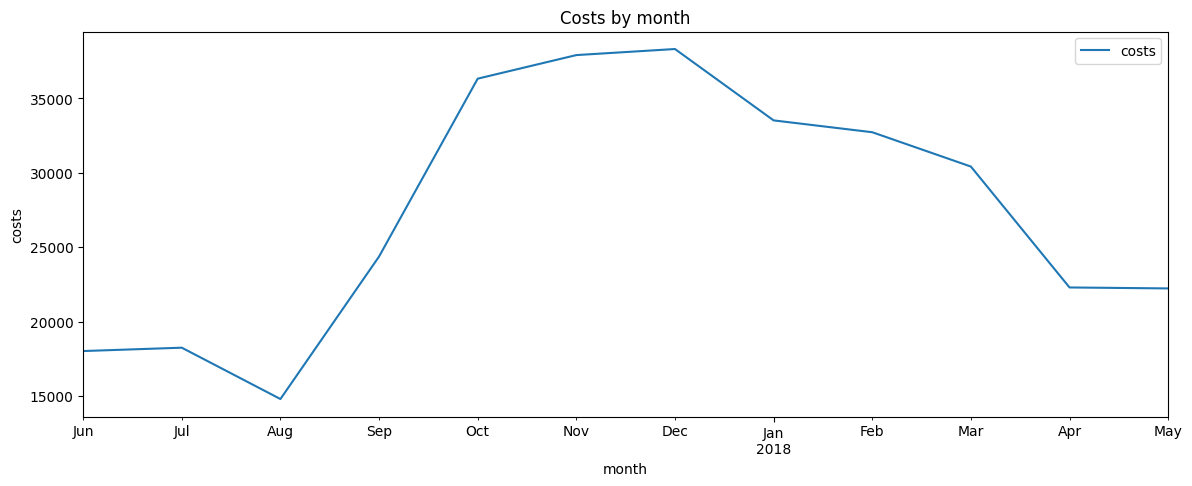

In [280]:
# Adicionamos a coluna de meses
costs['month'] = costs['dt'].dt.to_period("M")

# Criamos um gráfico para mostrar os custos ao longo do tempo
costs_by_month = costs.groupby(['month'])[['costs']].sum()
costs_by_month.plot(figsize=(14,5), title='Costs by month', xlabel = 'month', ylabel = 'costs')

<Axes: title={'center': 'Costs per source by month'}, xlabel='month', ylabel='costs'>

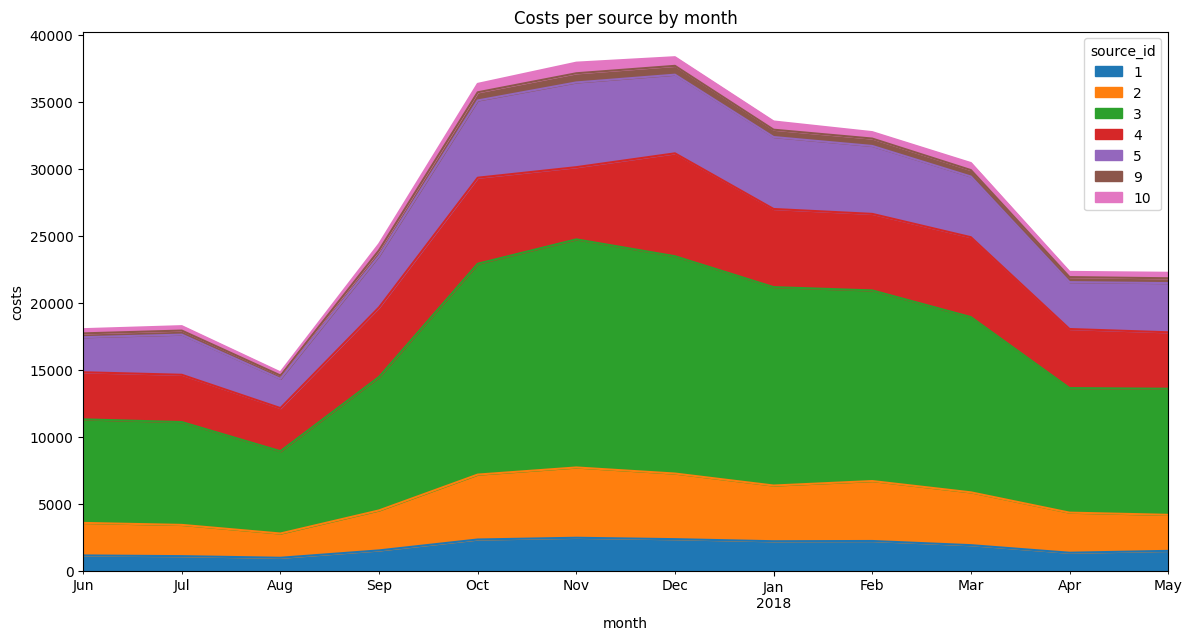

In [281]:
# Agrupando os dados por origem
costs_pivot = costs.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
)

# Plotando o gráfico por origem
costs_pivot.plot(kind='area', figsize=(14,7), title='Costs per source by month', xlabel = 'month', ylabel = 'costs')

No gráfico extraído dos custos no período vemos custos bastante significativos nas origens 3, 4, 5, 9 e 10, que se concentraram principalmente no meio do período, ou seja, de outubro de 2017 até março de 2018.

##### 2.3.2 Quanto custou a aquisição de clientes para cada origem?

In [282]:
# Calculando o CAC médio
mean_cac = round(costs['costs'].sum() / orders['uid'].nunique(),2)

print("O CAC total médio é igual a ",mean_cac)

O CAC total médio é igual a  9.01


In [283]:
# Selecionamos o número de compradores de cada mês e inserimos na tabela de costs
buyers_month = (first_orders.groupby('first_order_month')['uid']
                .nunique()
                .reset_index()
                .rename(columns={'uid':'n_buyers'})
)

df_cac = costs.merge(buyers_month, left_on='month', right_on='first_order_month', how='left')

df_cac

,source_id,dt,costs,month,first_order_month,n_buyers
0,1,2017-06-01,75.20,2017-06,2017-06,2023
1,1,2017-06-02,62.25,2017-06,2017-06,2023
2,1,2017-06-03,36.53,2017-06,2017-06,2023
3,1,2017-06-04,55.00,2017-06,2017-06,2023
4,1,2017-06-05,57.08,2017-06,2017-06,2023
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05,2018-05,2988
2538,10,2018-05-28,21.26,2018-05,2018-05,2988
2539,10,2018-05-29,11.32,2018-05,2018-05,2988
2540,10,2018-05-30,33.15,2018-05,2018-05,2988


<Axes: title={'center': 'Average CAC by month'}, xlabel='Month', ylabel='Custo Unitário'>

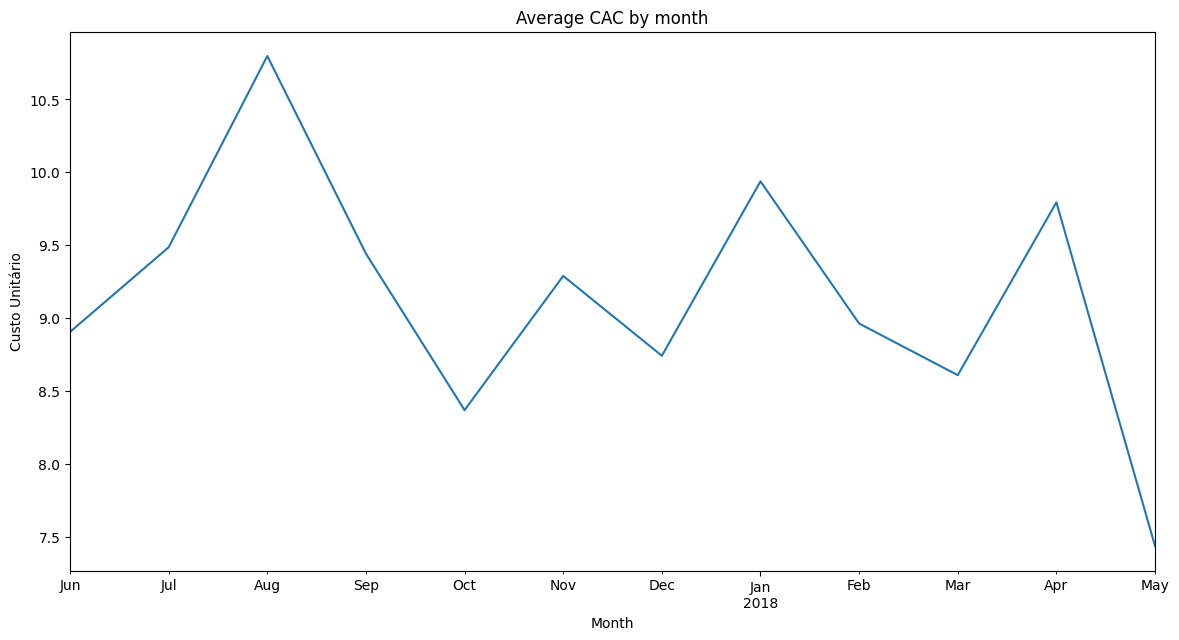

In [284]:
# Calculamos o custo de aquisição para cada linha para depois agrupar por cohort
df_cac['cac'] = df_cac['costs'] / df_cac['n_buyers'] 

# Agrupamos por mês e extraímos o gráfico
(df_cac.groupby('first_order_month')['cac']
 .sum()).plot(figsize=(14,7), title='Average CAC by month', xlabel = 'Month', ylabel = 'Custo Unitário')

In [285]:
# Utilizamos a tabela dinamica para agrupar por source
pivot_cac = df_cac.pivot_table(
    index='first_order_month',
    columns='source_id',
    values='cac',
    aggfunc='sum'
)
pivot_cac

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06,0.556406,1.199891,3.821873,1.737420,1.293188,0.140989,0.155324
2017-07,0.557920,1.213266,3.990832,1.835533,1.559095,0.157327,0.171513
2017-08,0.694752,1.321934,4.484336,2.348438,1.595095,0.181701,0.169759
2017-09,0.581949,1.156784,3.860345,2.011724,1.491337,0.161031,0.178485
2017-10,0.533583,1.116359,3.626092,1.479456,1.328894,0.140417,0.144525
2017-11,0.599157,1.285881,4.171855,1.320466,1.549949,0.167405,0.194158
2017-12,0.534155,1.117454,3.700552,1.752332,1.339840,0.150121,0.147356
2018-01,0.648141,1.232653,4.390388,1.729259,1.592505,0.162218,0.182138
2018-02,0.603802,1.225511,3.897168,1.564492,1.389019,0.151055,0.131712


<Axes: title={'center': 'Cac per source by month'}, xlabel='month', ylabel='costs'>

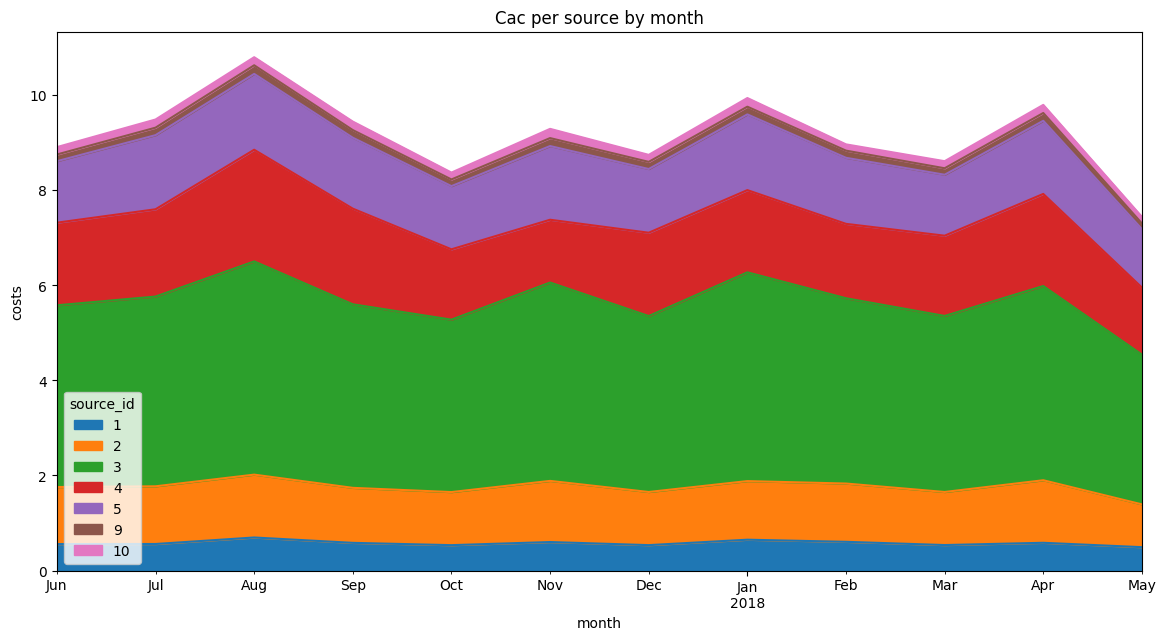

In [286]:
pivot_cac.plot(kind='area', figsize=(14,7), title='Cac per source by month', xlabel = 'month', ylabel = 'costs')

Neste ponto, olhando tanto o gráfico geral como o gráfico por source, notamos que os custos de aquisição de clientes variam mais ao longo dos meses principalmente para as source que tem maiores custos, que são as de id 10, 9, 5 e 4, as demais tem custos baixos e não variam muito ao longo dos meses. Resta verificar se essas com custo mais baixo compensa ao ser levado em consideração o retorno sobre seus investimentos. Além disso, vemos um gráfico bastante diferente do gráfico de custos, registrando a conversão dos investimentos na aquisição de novos clientes.

##### 2.3.3 Os investimentos valeram a pena? (ROI)

<Axes: title={'center': 'Retorno sobre o investimento por mês'}, xlabel='Month', ylabel='ROMI'>

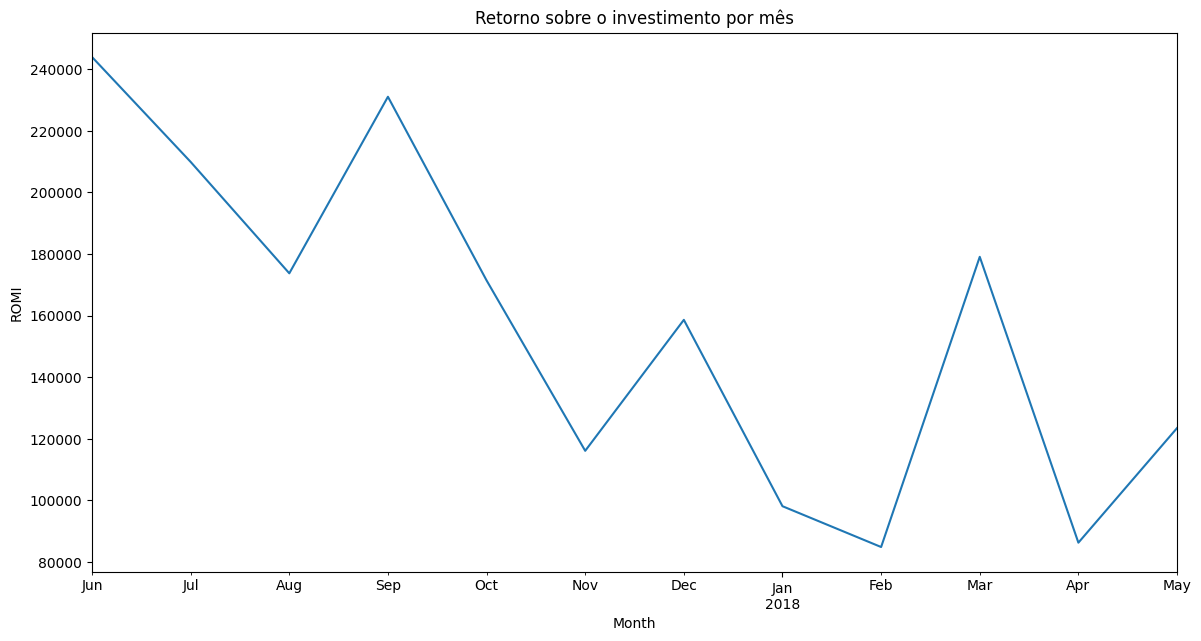

In [287]:
# Agrupando o df que possui os dados do LTV por cohort
ltv_month = report.groupby('first_order_month')['ltv'].sum().reset_index()

# Inserimos esse df no df com valores do cac e calculamos o ROMI por linha
romi = df_cac.merge(ltv_month, on='first_order_month')
romi['romi'] = romi['ltv'] / romi['cac']

# Agrupamos por mês e extraímos o gráfico
(romi.groupby('first_order_month')['romi']
 .sum()).plot(figsize=(14,7), title='Retorno sobre o investimento por mês', xlabel = 'Month', ylabel = 'ROMI')

<Axes: title={'center': 'Retorno do investimento por origem por mês'}, xlabel='month', ylabel='ROMI'>

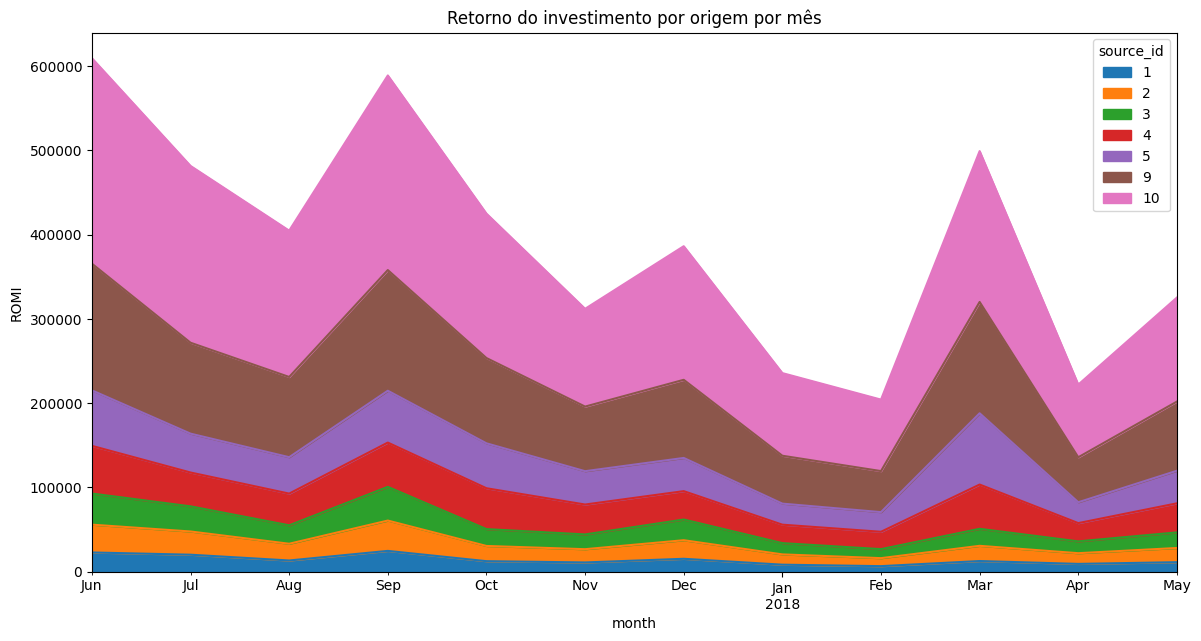

In [288]:
# Aplicamos a tabela dinâmica para avaliar os dados por source
romi_pivot = romi.pivot_table(
    index='first_order_month',
    columns='source_id',
    values='romi',
    aggfunc='sum'
).cumsum(axis=1)

romi_pivot.plot(kind='area', figsize=(14,7), title='Retorno do investimento por origem por mês', xlabel = 'month', ylabel = 'ROMI')

Agora, com o gráfico dos retornos por source fica claro que quanto maior o custo investido, também se alcança o maior retorno, além disso, vemos como o retorno também varia conforme o passar dos meses, uma vez que é calculado em função do LTV.

#### 3 - Recomendações

Com base nos dados extraídos das tabelas, vemos como os anúncios têm diferentes custos e diferentes rentabilidades. Com base no ROMI, vemos que as origens que possuem maiores custos (cac) também trazem os maiores retornos, e por conta disso, a conclusão que se pode retirar das análises, é que devemos investir mais nessas que trazem mais retorno, ou seja, as sources 10 e 9.